
# Exploring Data distributions

Before we move into the analysis we need to inspect the structure and format of the data. We need to check the quality and quantity of the data. For each column in a tidy table, we should understand the content, the meaning of the column label, the used datatype, and the used units. We cannot interpret the results if we do not understand fully the context of the data and the quality of the data. A few standard questions you should always consider are

- What is the structure of the data (data types, descriptive statistics)
- How many features and how many observations are there available
- Are there any missing data and is imputation needed?
- Is my data balanced?
- Are there outliers?
- Are features correlated?
- Is normalization needed?
- Is data transformation needed?
- Is data redundant?

In this notebook we work with the famous iris dataset to demonstrate several data exploration techniques. I used seaborn and holoview as plotting libraries, but almost all libraries contain methods for plotting the types of figures plotted in this notebook

# Describe the data

In [1]:
import pandas as pd
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
iris =  pd.read_csv(csv_url, names = col_names)
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


So our dataframe has 5 features, the last one is the describing the class, there are no missing values and we have 150 observations

We might get a feeling for the categorical data by asking for the unique values

In [75]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are three classes

Data exploration starts with some descriptive statistics. What can we determine from ranges between minimum, maximum, the standard deviation and the mean? These are statistics that gives us a clue how the data is distributed. Descriptives analyse the location of the central tendency and the variability of the features. It is also useful to explore how the data is distributed overall.

In [2]:
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Since we have different species it is interesting to stratisfy 

In [3]:
iris.groupby(['Species']).mean()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [4]:
iris.groupby(['Species']).std()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [76]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Plotting

It is highly recommended to plot the distribution first before we assess statitically the distribution (for instance with a normality test). We can use several plots for this. Most commonly used plots are the barplot, boxplot, the frequency table, the histogram and the kernel denisty plot. 

In [78]:
#https://holoviews.org/user_guide/Customizing_Plots.html
import hvplot.pandas

## barplot

Barplot we can use for checking the balance in our dataset. 

<AxesSubplot:>

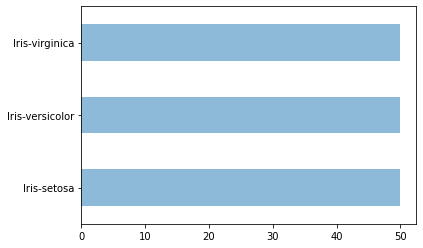

In [68]:
iris.Species.value_counts().plot(kind = 'barh', alpha = 0.5)

## boxplot


Boxplots are based on perentiles and are a quick way to vizualize the distribution of the data. In a boxplot the median is plotted, 50% in the box and the whiskers represent the distribution edges. Any data outside the whiskers is plotted as a single point or circle, these can be considered as outliers.

In [6]:
boxplot = iris.hvplot.box(y='Sepal_Length', 
                          by='Species', 
                          legend = False,
                          box_alpha = 0.5)
boxplot

:BoxWhisker   [Species]   (Sepal_Length)

We can see from the boxplot that the virginica has an outlier, and that the species differ from each other in mean and also in variance

## histogram

A histogram is an approximate representation of the distribution of numerical data. Data is divided into intervals (bins) and then count how many values fall into each interval. The bins are plotted on the x-axis, the count on the y-axis. In the example below each species has a different color. By coloring the species the different distributions of the different classes is displayed in one graph.


In [7]:
histogram = iris.hvplot.hist('Sepal_Length', 
                             by='Species', 
                             alpha = 0.5)
histogram

:NdOverlay   [Species]
   :Histogram   [Sepal_Length]   (Sepal_Length_count)

Sometimes it is more informative to plot them seperately 

In [8]:
histogram = iris.hvplot.hist('Sepal_Length', 
                             by='Species', 
                             alpha = 0.5, 
                             subplots=True,
                             width = 250)
histogram

:NdLayout   [Species]
   :Histogram   [Sepal_Length]   (Sepal_Length_count)

We can indeed see the outlier in the virginica Sepal_length. 

## density plots

Density plots are a variation of Histograms. It uses a kernel to predict the count value and smoothens across the x-axis. An advantage of Density Plots over Histograms is that they’re not affected by the number of bins, and therefor better at determining the distribution shape. Normal distribution curves are an example of density plots

In [9]:
iris.hvplot.kde('Sepal_Length', 
                    by='Species')

:NdOverlay   [Species]
   :Distribution   [Sepal_Length]   (Density)

In [10]:
iris.hvplot.kde('Sepal_Length', 
                by='Species',
                alpha = 0.5, 
                subplots=True,
                width = 250)

:NdLayout   [Species]
   :Distribution   [Sepal_Length]   (Density)

## violin plot
You can combine the density distribution and the boxplot into a violin plot. A violin plot is an enhancement of the boxplot and plot the density estimate with the density on the y-axis. The advantage of this plot that it can show nuances in the distribution in comparison with the boxplot. The outliers however are less clearly to visualize. Best practise is to plot boxplot in the violin plot. This kind of plot is extremely informative plotting distribution, outliers, central tendency and variation.

In [77]:
iris.hvplot.violin('Sepal_Length', 
                    by='Species', legend=False, 
                    width=700, height=500, padding=0.5)

:Violin   [Species]   (Sepal_Length)

## grids
So far we only plotted one factor, the Sepal length. For exploratory data analysis we often use grids (facets) to plot all the columns into one overview. The following piece of code displays the histograms of all the numerical columns in the dataframe

array([[<AxesSubplot:title={'center':'Sepal_Length'}>,
        <AxesSubplot:title={'center':'Sepal_Width'}>],
       [<AxesSubplot:title={'center':'Petal_Length'}>,
        <AxesSubplot:title={'center':'Petal_Width'}>]], dtype=object)

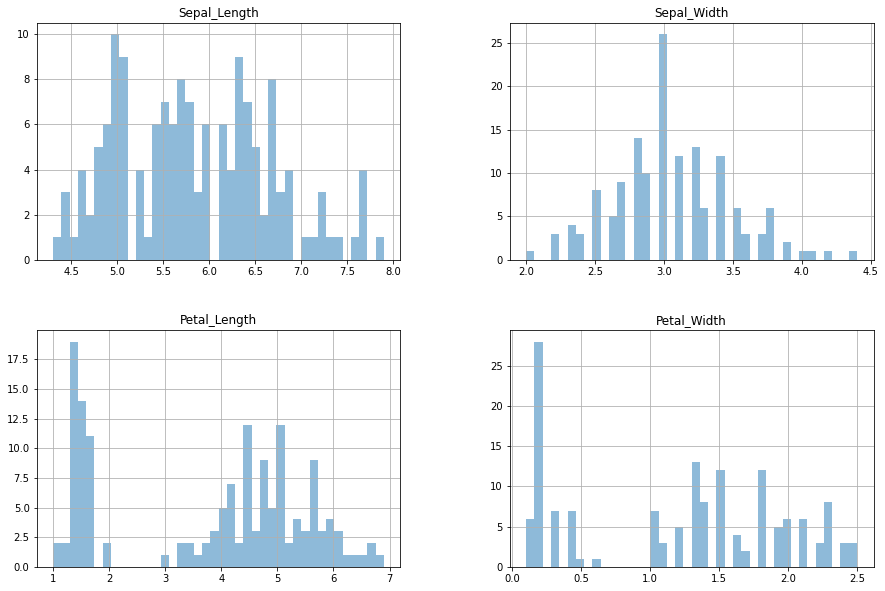

In [12]:
iris.hist(bins=40, figsize=(15, 10), alpha = 0.5)

## pairplots
pairplots can also be used to investigate relations between factors

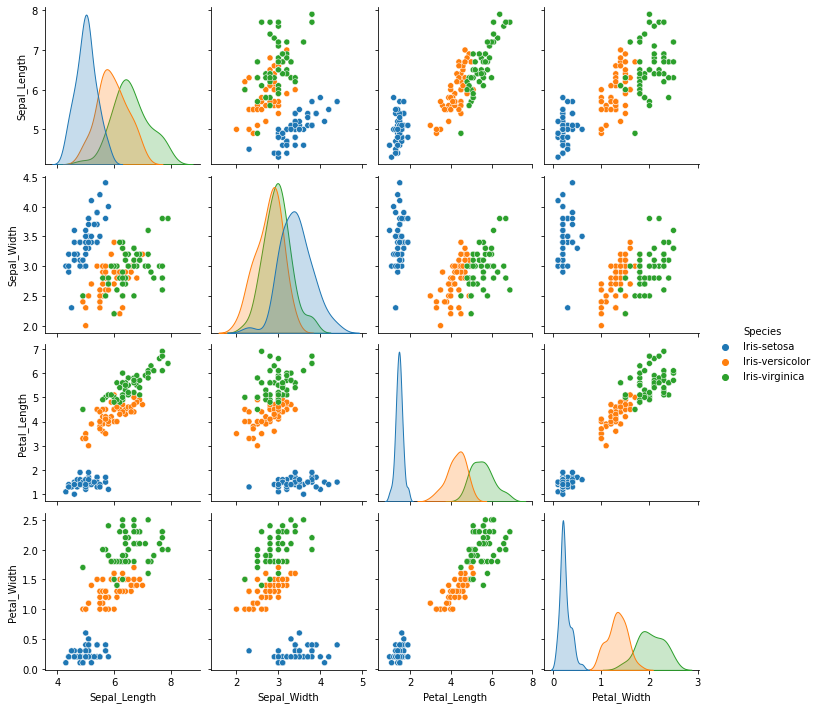

In [13]:
import seaborn
seaborn.pairplot(iris, hue='Species')

We can see that petal_length and petal_width are highly related

## heatmap

Another way of showing relations is by a heatmap

In [73]:
df = iris.drop(['Species'],axis = 1)
c = df.corr().abs()
y_range = (list(reversed(c.columns)))
x_range = (list(c.index))
c

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,0.109369,0.871754,0.817954
Sepal_Width,0.109369,1.000000,0.420516,0.356544
Petal_Length,0.871754,0.420516,1.000000,0.962757
Petal_Width,0.817954,0.356544,0.962757,1.000000


<AxesSubplot:>

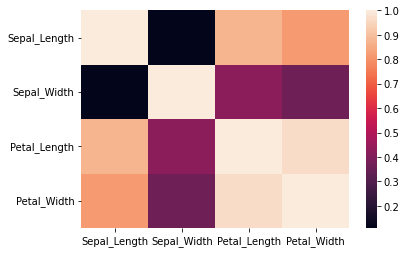

In [74]:
sns.heatmap(c)

Again, Petal length and Petal width are highly related

## qqplot
If it is of importance that a variable is normally distributed (because of the statisitcal model you would like to use), you can also use a QQ-plot. A QQ-plot is used to visually determine how close a sample is to a the Normal distribution. If the points fall roughly on the diagonal line, then the samples can be considered to be distributed normal

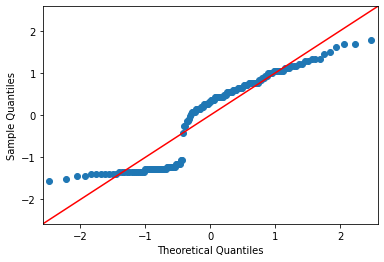

In [70]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(iris.Petal_Length, fit = True, line = '45')
plt.show()

 In this example we can see that the samples are not all on the line, this might be due to the different species. Best practise is to stratisfy

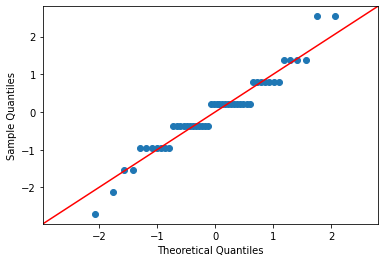

In [39]:
fig = sm.qqplot(iris[iris.Species == 'Iris-setosa'].Petal_Length, fit = True, line = '45')
plt.show()

## Statistical test

The Shapiro-Wilk normality test tests if the data is normally distributed. The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than 0.05, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed

In [41]:
from scipy.stats import shapiro
shapiro(iris[iris.Species == 'Iris-setosa'].Petal_Length)

ShapiroResult(statistic=0.9549460411071777, pvalue=0.05465003103017807)

If data is not normally distributed we might consider a transformation like a log transformation to make it normal. A log transformation is a process of applying a logarithm to data to reduce its skew. We can check the skewness by `skew()`. Skewness however can be due to for instance different species. This skewness can only be used if we are certain of homogenity of our samples

In [49]:
#check skewness
iris.skew(numeric_only=True)

Sepal_Length    0.314911
Sepal_Width     0.334053
Petal_Length   -0.274464
Petal_Width    -0.104997
dtype: float64

Logtransformation is only recommended for highly skewed data